<a href="https://colab.research.google.com/github/aiai949/huizhou/blob/master/hw5_Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! python3 --version

Python 3.6.8


In [0]:
pip install numpy

In [0]:
pip install cloudmesh-installer

In [0]:
import numpy as np

In [0]:
pip install cloudmesh-common

In [0]:
!pip install cloudmesh-installer
!pip install cloudmesh-common

In [0]:
! pip install tensorflow-gpu==1.14.0

In [0]:
! python3 --version

Python 3.6.8


In [0]:
! pip install matplotlib

# Import library

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

from cloudmesh.common.StopWatch import StopWatch

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Load data

In [0]:
StopWatch.start("data-load")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
StopWatch.stop("data-load")

5

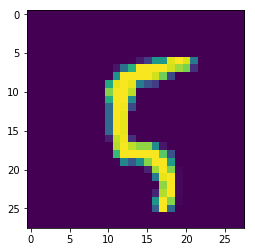

In [0]:
x1 = x_train[100]
y1 = y_train[100]
plt.imshow(x1)
y1


# Identify number of classes

In [0]:
num_labels = len(np.unique(y_train))
num_labels

10

# Convert labels to one-hot Vector

**Exercise MNIST_V1.0.0: Understand what is an one-hot vector?**

one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Image Reshaping

In [0]:
image_size = x_train.shape[1]
input_size = image_size * image_size

# Resize and Normalize

**Execrcise MNIST_V1.0.1: Suggest another way to normalize the data preserving the accuracy or improving the accuracy.**

Z-score

In [0]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# Create a Keras Model

**Exercise MNIST_V1.1.0: Find out what is a dense layer?**

A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. The layer has a weight matrix W, a bias vector b, and the activations of previous layer a.

**Execrcise MNIST_V1.2.0: Find out what is the use of an activation function. Find out why, softmax was used as the last layer.**

Activation function are really important for an Artificial Neural Network to learn and make sense of something really complicated and Non-liner complex functional mappings between the imputs and response varibale. They introduce non-liner properties to our Network. Their main purpose is to convert an input signle of a node in a A-NN to an output signal. That output signal now is as an input in the next layer in the stack. 

The softmax function is simply a generalisation of the logistic function, which simply squashes values into a given range.
At the final layer of a neural network, the model produces its final activations.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


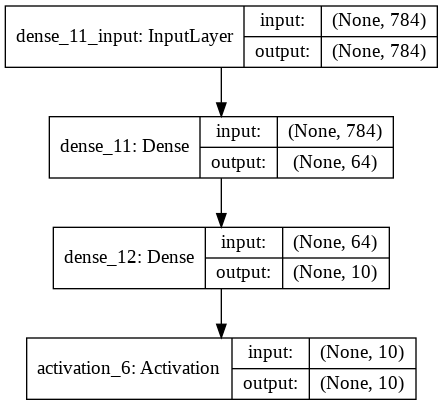

In [0]:
batch_size = 4
hidden_units = 64

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mnist_v1.png', show_shapes=True)

# Compile and Train

**Exercise MNIST_V1.3.0: Find 3 other optimizers used on neural networks.**

1: Gradient descent(gd)
2: Momentum
3: Adam

**Exercise MNIST_V1.4.0: Find other loss functions provided in keras. Your answer can limit to 1 or more.**

1: Mean Squared Error

keras.losses.mean_squared_error(y_true, y_pred);

2: Mean absolute Error

keras.losses.mean_absolute_error(y_true, y_pred);

3: Huber Loss

keras.losses.huber_loss(y_true, y_pred, delta=1.0);

**Exercise MNIST_V1.5.0: Figure out a way to plot the loss function value.You can use any method you like.**

Scatter plots. Uding liner regression. Making a model to build relationship between dependent variable(y) and independent variable(x).

In [0]:
StopWatch.start("compile")
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

StopWatch.stop("compile")
StopWatch.start("train")
model.fit(x_train, y_train, epochs=4, batch_size=batch_size)
StopWatch.stop("train")

Epoch 1/4
60000/60000 [==============================] - 25s 415us/step - loss: 0.3719 - acc: 0.8942
Epoch 2/4
60000/60000 [==============================] - 26s 428us/step - loss: 0.3199 - acc: 0.9099
Epoch 3/4
60000/60000 [==============================] - 25s 421us/step - loss: 0.3040 - acc: 0.9151
Epoch 4/4
60000/60000 [==============================] - 25s 419us/step - loss: 0.2974 - acc: 0.9158


# Testing

Exercise MNIST_V1.6.0: Try to optimize the network by changing the
number of epochs, batch size and record the best accuracy that you can gain

I have changed eposize and batch size. It was found that epoch increased and batch increased, which would increase the accuracy. compared the data. when epoch is 4,batch_size is 10, hadden_unites is 64, the acc is 92.1%; when epoch is 4, batches_size is 4, hidden_unites is 64, the acc is 91.7%. 

In [0]:
StopWatch.start("test")
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
StopWatch.stop("test")


10000/10000 [==============================] - 2s 188us/step

Test accuracy: 91.7%


In [0]:
StopWatch.benchmark()


+---------------------+------------------------------------------------------------------+
| Machine Attribute   | Value                                                            |
+---------------------+------------------------------------------------------------------+
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.3 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           